In [1]:
%matplotlib inline
%load_ext nengo.ipynb

<IPython.core.display.Javascript object>

With non orthogonal inputs some context updates don't happen. Also similarity profiles are not completely matching up.

In [2]:
import matplotlib.pyplot as plt
import nengo
import numpy as np
from nengo import spa

In [3]:
from imem.analysis.context import ContextTestEnv, plot_ctx_net_analysis
from imem.legacy.context import AlternatingMemories

In [4]:
env = ContextTestEnv(1)

In [5]:
with nengo.Network(seed=2) as model:
    input_node = nengo.Node(env.recalled_ctx_fn)
    context_net = AlternatingMemories(env.d, env.beta)
    nengo.Connection(input_node, context_net.input)
    
    init_phase = nengo.Node(lambda t: t < env.init_phase)
    initialization_node = nengo.Node(env.context_init_fn, size_in=env.d)
    nengo.Connection(initialization_node, context_net.gate.input, transform=5.)
    nengo.Connection(init_phase, context_net.update_done.neurons,
                     transform=-2. * np.ones((context_net.update_done.n_neurons, 1)))
    nengo.Connection(init_phase, context_net.invert.neurons,
                     transform=-2. * np.ones((context_net.invert.n_neurons, 1)))
    
    p_recalled_ctx = nengo.Probe(input_node, synapse=0.01)
    p_ctx = nengo.Probe(context_net.output, synapse=0.01)

In [6]:
with nengo.Simulator(model) as sim:
    sim.run(env.n)

The installed widget Javascript is the wrong version.
The installed widget Javascript is the wrong version.


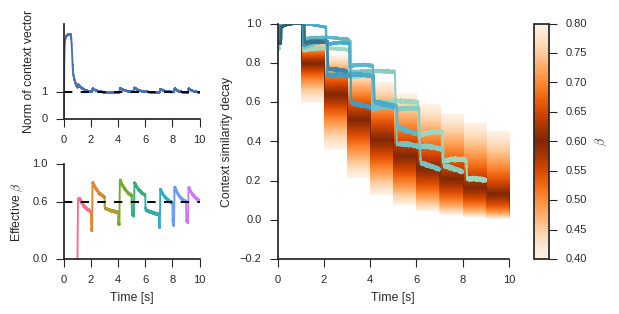

In [7]:
sns.set('paper', 'ticks')
fig = plt.figure(figsize=(6.3, 6.3 / 2.))
plot_ctx_net_analysis(sim.trange(), sim.data[p_recalled_ctx], sim.data[p_ctx], env, fig=fig)